Nama    : Muhammad Fajrul Amin

NIM     : 1306620045

Kelas   : Fisika A

In [8]:
import numpy as np
from matplotlib import pylab
from scipy.fftpack import fft2, ifft2
import scipy.fftpack as fp
from PIL import Image
import scipy.stats as snr
import numpy.fft as fp
from skimage.color import rgb2gray
from skimage.io import imread
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

### FFT dengan Scipy.fftpack

SNR for the original image = <module 'scipy.stats' from '/usr/local/lib/python3.7/dist-packages/scipy/stats/__init__.py'>
SNR for the image obtained after reconstruction = <module 'scipy.stats' from '/usr/local/lib/python3.7/dist-packages/scipy/stats/__init__.py'>


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: ComplexWarning: Casting complex values to real discards the imaginary part


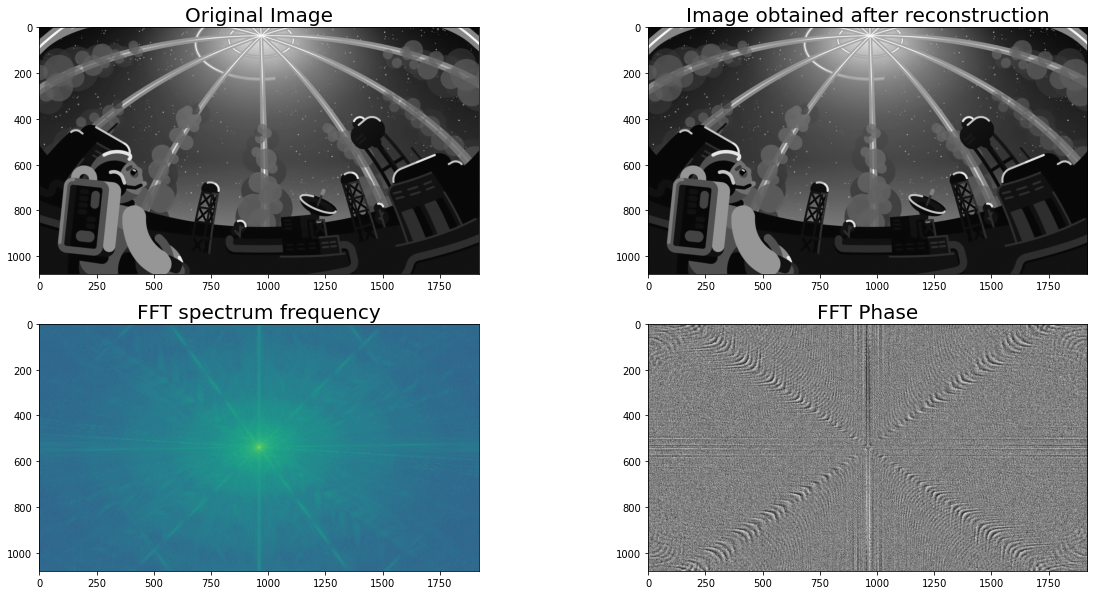

In [9]:
im = np.array(Image.open('space.png').convert('L')) # we shall work with grayscale image
def calc_snr(im):
    snr = stats.signaltonoise(im, axis=None)
    return snr
print('SNR for the original image = ' + str(snr))
# SNR for the original image = 2.023722773801701
# now call FFT and IFFT
freq = fp.fft2(im)
freq2 = fp.fftshift(freq)
im1 = fp.ifft2(freq).real
def calc_snr(im1):
    snr = stats.signaltonoise(im1, axis=None)
    return snr
print('SNR for the image obtained after reconstruction = ' + str(snr))
# SNR for the image obtained after reconstruction = 2.0237227738013224
assert(np.allclose(im, im1)) # make sure the forward and inverse FFT areclose to each other
pylab.figure(figsize=(20,10))
pylab.subplot(2,2,1), pylab.imshow(im, cmap='gray')
pylab.title('Original Image', size=20)
pylab.subplot(2,2,2), pylab.imshow(im1, cmap='gray')
pylab.title('Image obtained after reconstruction', size=20)
pylab.subplot(2,2,3), pylab.imshow( (20*np.log10( 0.1 + freq2)).astype(int))
pylab.title('FFT spectrum frequency', size=20)
pylab.subplot(2,2,4), pylab.imshow(np.angle(fp.fftshift(freq)), cmap='gray')
pylab.title('FFT Phase', size=20)
pylab.show()


### FFT dengan numpy.fft

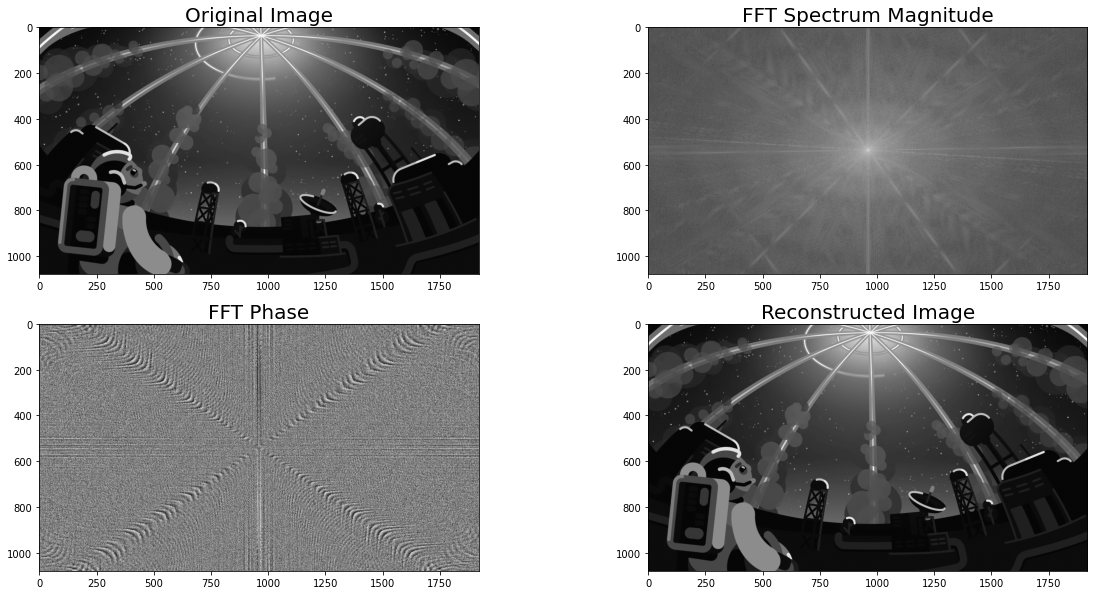

In [10]:
im1 = rgb2gray(imread('space.png'))
pylab.figure(figsize=(20,10))
freq1 = fp.fft2(im1)
im1_ = fp.ifft2(freq1).real
pylab.subplot(2,2,1), pylab.imshow(im1, cmap='gray'), pylab.title('Original Image', size=20)
pylab.subplot(2,2,2), pylab.imshow(20*np.log10( 0.01 + np.abs(fp.fftshift(freq1))), cmap='gray')
pylab.title('FFT Spectrum Magnitude', size=20)
pylab.subplot(2,2,3), pylab.imshow(np.angle(fp.fftshift(freq1)), cmap='gray')
pylab.title('FFT Phase', size=20)
pylab.subplot(2,2,4), pylab.imshow(np.clip(im1_,0,255), cmap='gray')
pylab.title('Reconstructed Image', size=20)
pylab.show()


### Transformasi balik

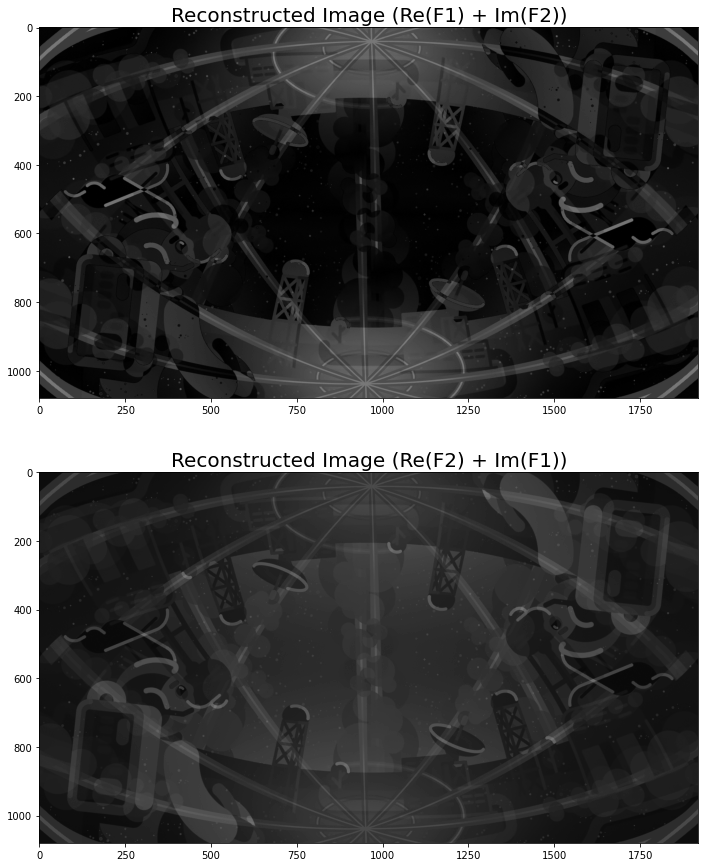

In [11]:
pylab.figure(figsize=(20,15))
im1_ = fp.ifft2(np.vectorize(complex)(freq1.real, freq2.imag)).real
im2_ = fp.ifft2(np.vectorize(complex)(freq2.real, freq1.imag)).real
pylab.subplot(211), pylab.imshow(np.clip(im1_,0,255), cmap='gray')
pylab.title('Reconstructed Image (Re(F1) + Im(F2))', size=20)
pylab.subplot(212), pylab.imshow(np.clip(im2_,0,255), cmap='gray')
pylab.title('Reconstructed Image (Re(F2) + Im(F1))', size=20)
pylab.show()

### Adaptive Tresholding

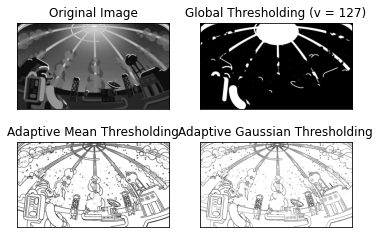

In [13]:
img = cv.imread('space.png',0)
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()